# Chapter 09 -- Panda Time Series and Date Handling--DRAFT

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling"> Creating and manipulating a fixed-frequency of datetime spans </a>

Convert time series from one frequency to another

Increment 'non-standard' datetimes intervals (e.g. business week)

Time Series Walk-Through

Chapter 8, <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2008%20--%20Python%20Date%2C%20Time%2C%20and%20%20Timedelta%20Objects.ipynb"> Understanding Date Time and TimeDelta objects </a> provided a short introduction to Python's built-in datetime capabilities.  In this chapter we illustrate pandas time series and date handling.  



In [55]:
from datetime import date, time, datetime, timedelta
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Creating and manipulating a fixed-frequency of date and time spans

The pd.date_range() method generates a DateTime Index which is applied to a panda Series or DataFrame to provide datetime interval indexing.  We will see examples of its construction methods.  And later we will utilize indexers taking advange of the Date TimeIndex.  

In [11]:
rng = pd.date_range('1/1/2016', periods=90, freq='D')

Print the first 10 dates in the DateTimeIndex

In [12]:
rng[:10]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [13]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [14]:
type(ts)

pandas.core.series.Series

Time-stamped data for pandas represent a point in time.

Period being inferred from the datetime string.

In [15]:
pd.Period('2016-01-01')

Period('2016-01-01', 'D')

Get type

In [16]:
type(pd.Period('2016-01-01'))

pandas._period.Period

Period being set explicitly

In [17]:
pd.Period('2016-05', freq='D')

Period('2016-05-01', 'D')

Timestamp and Period can be an index.  Coerced into PeriodIndex and DateTimeIndex

In [18]:
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]

In [19]:
dates

[Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-05-02 00:00:00'),
 Timestamp('2012-05-03 00:00:00')]

In [20]:
 ts = pd.Series(np.random.randn(3), dates)

In [21]:
ts

2012-05-01   -0.589761
2012-05-02   -0.158049
2012-05-03    0.638963
dtype: float64

In [22]:
type(ts.index)

pandas.tseries.index.DatetimeIndex

In [23]:
ts.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

Convert date string to datetime

In [24]:
pd.to_datetime('2016/11/30')

Timestamp('2016-11-30 00:00:00')

In [25]:
type(pd.to_datetime('2016/11/30'))

pandas.tslib.Timestamp

Convert date string to Timestamp

In [26]:
pd.Timestamp('2016/11/30')

Timestamp('2016-11-30 00:00:00')

In [27]:
type(pd.Timestamp('2016/11/30'))

pandas.tslib.Timestamp

You can assemble a DataFrame by using strings and integers for columns.

In [28]:
df = pd.DataFrame({'year': [2014, 2015, 2016],
                   'month': [1, 2, 3],
                   'day': [1,2,3,]})
df1 = pd.to_datetime(df)

In [29]:
from datetime import datetime, date, time
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
rng = pd.date_range(start,end)

In [30]:
rng

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [31]:
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
b_rng = pd.bdate_range(start,end)

In [32]:
b_rng

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=261, freq='B')

In [33]:
rng = pd.date_range(start, end, freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30'],
              dtype='datetime64[ns]', freq='BM')

Returns the first 5

In [34]:
ts[:5].index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq='BM')

 Returns the nth, i.e. 2 = every other one

In [35]:
ts[::2]

2016-01-29    1.055194
2016-03-31   -0.049875
2016-05-31   -1.305961
2016-07-29    1.163317
2016-09-30   -0.181580
2016-11-30   -1.049180
Freq: 2BM, dtype: float64

In [36]:
ts[::6]

2016-01-29    1.055194
2016-07-29    1.163317
Freq: 6BM, dtype: float64

## Time Series Walk-Through

We can begin combining features covered in previous chapters to conduct a walk-through of an actual time-series analysis.  The data is the FHFA House Price Index (HPI) 

It is a broad measure of the movement of single-family house prices. The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac.  

Details about the data and how it is organized can be found <a href="https://catalog.data.gov/dataset/fhfa-house-price-indexes-hpis"> here </a>. 

This time series begins January 1991 and end August 2016.  Both the seasonally adjusted index 'index_sa' and the non-seaonally adjusted index 'index_nsa' set the index value at 100 for January 1991.  

The .csv file is two parts.  Part 1, rows 2 to 3079 are records for the aggregate market groups at the Census Division level.  The frequency interval is monthly.

Part 2, rows 3080 to 96,243 are more granular with 4 values for level, 'MSA', 'State', 'USA or Census Division', and 'Puerto Rico'.  The frequency interval is quarterly. 

Start with the U.S. portion by reading part 1 of the file.  The pd.read_csv method uses the one required arguement, the input file name to create the DataFrame 'df_all'.

In [37]:
df_all = pd.read_csv("C:\Data\\HPI_master.csv")

Check the first 5 rows to determine if the read_csv() method is giving the expected results.

In [38]:
df_all.tail()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
99320,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,2,160.23,158.62
99321,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,3,159.54,161.27
99322,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2015,4,155.14,152.81
99323,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2016,1,150.61,154.71
99324,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2016,2,165.45,163.82


We need to combine the year and period fields into a DataTime Stamp.  The .csv file in cell #xx above is read without any datetime parsing for the fields, 'yr' and 'period'.  We could post-process these fields to construct the appropriate date timestamp values.  

A better approach is below.  The parse_dates= argument allows a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#dictionary"> dictionary </a> object with the key being the arbitrary name of the new column created and the key values indicating which fields are to be read in the .csv file.  Recall that Python indexes have a start position of 0.  In the .csv file, these fields are the 7th and 8th.

Sometimes, you may need to create your own date-parser, analogous to building a user-defined SAS INFORMAT to map field values into a datetime object.  This is particularly true in cases where the date value is stored as component values in multiple fields.   

## url for custom date_parser here

In [39]:
df = pd.read_csv("C:\Data\\HPI_master.csv",
                 parse_dates={'date_idx': [6,7]},
                 nrows=3080)

In [40]:
df.shape

(3080, 9)

Check for missing values.

In [41]:
df.isnull().any()

date_idx      False
hpi_type      False
hpi_flavor    False
frequency     False
level         False
place_name    False
place_id      False
index_nsa     False
index_sa      False
dtype: bool

Map the string 'date_idx' column constructed through the date_parser to a datetime value.  Set the 'date' column as the index on the DataFrame.

In [42]:
df['date'] = pd.to_datetime(df['date_idx'])
df.set_index("date", inplace=True, drop=False)

Indexing on the datetime column 'date' creates a 'time-aware' DateTimeIndex.  

In [43]:
df.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01'],
              dtype='datetime64[ns]', name='date', length=3080, freq=None)

Get the first and last date values.

In [44]:
print('Earliest date is:', df.date.min())
print('Latest date is:', df.date.max())

Earliest date is: 1991-01-01 00:00:00
Latest date is: 2016-08-01 00:00:00


We see from cell #xx above, that we have several categorical columns.  So we need to understand their levels.  Earlier, we saw the .describe() method used for numerical columns.  In this example, specifying the 'include=' argument provides a description of string columns.  

In [45]:
df.describe(include=['O'])

,hpi_type,hpi_flavor,frequency,level,place_name,place_id
count,3080,3080,3080,3080,3080,3080
unique,1,1,1,1,10,10
top,traditional,purchase-only,monthly,USA or Census Division,Middle Atlantic Division,DV_NE
freq,3080,3080,3080,3080,308,308


The 'place_name' column has 10 unique levels or values.  We can examine these values with the .unique() attribute.

In [46]:
df.place_name.unique()

array(['East North Central Division', 'East South Central Division',
       'Middle Atlantic Division', 'Mountain Division',
       'New England Division', 'Pacific Division',
       'South Atlantic Division', 'West North Central Division',
       'West South Central Division', 'United States'], dtype=object)

By setting an index on the column 'place_name', create a sub-set of the DataFrame 'df_all' to include just those rows for the U.S.  The .loc indexer allows row slicing which is covered in detail <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.loc-Indexer"> here </a>.

In [47]:
df.set_index('place_name', inplace=True, drop=False)
df_us = df.loc['United States']

Time series data lends itself well to plotting.  Here we use the bokeh package to plot the non-seasonal home price index for three regions.  

Start by plotting the series for the entire U.S.  For this, we use the 'df_us' DataFrame created above.

In [48]:
import bokeh.charts
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [49]:
p = bokeh.charts.Line(df_us, x='date', y='index_nsa', color='firebrick',  title="Home Price Values in the U.S.")

# Display it
bokeh.io.show(p)

In [50]:
df_us_3 = df.loc[['West South Central Division', 'United States', 'Pacific Division']]

In [51]:
p = bokeh.charts.Line(df_us_3, x='date', y='index_nsa', color='place_name',
                      legend="top_left")

bokeh.io.show(p)

During the Great Recession of 2008-2010, home prices across the U.S. declined dramatically.  Home prices in the Pacific region, which includes California, grew significantly more than the U.S. as a whole.  Aggregate U.S. home prices have regained all of their price losses since then and the Pacific and West South Central regions are not too far behind. 

To continue this analysis, we need to read the remainder of the .csv containing state-level data.  In this instance, we use to 'skiprows=' argument to begin reading on row 3084.  We specify the columns 

Beginning on row 3081, there are no values for the field 'index_sa'.  We re-read starting with row 3081 to the end of the file.  And since the default is to key off the column names, we will need to supply the column mappings.  And because we are reading from an arbirary start point, we supply a  <a href= "http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple </a> of names.  Header=None is needed in order to prevent the reader from attempting to build column names at row position nrows-1, which in our case contains data values.

There are no values for seasonally adjusted prices beyond rows 3081.

In [52]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",
            parse_dates={'date_idx': [6,7]},
            skiprows=3083,
            usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
            names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
            header=None)

The following SAS Data Step reads the same .csv file.

````
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3083; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

In [53]:
df_states.head()

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
0,1987-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.91
1,1987-02-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,100.76
2,1987-03-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,94.02
3,1987-04-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,91.43
4,1988-01-01,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,81.65


First 5 rows of the SAS data set df_states.

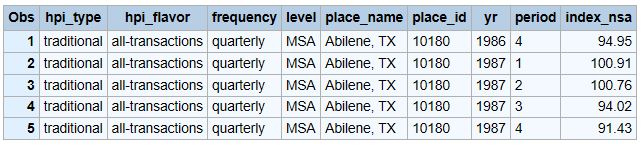

In [56]:
Image(filename='Anaconda3\\output\\df_states_output.JPG')  

In [57]:
df_states.level.unique()

array(['MSA', 'State', 'USA or Census Division', 'Puerto Rico'], dtype=object)

PROC SQL used to select unique values from the variable 'level'.

````
    56       proc sql;
    57          select unique level
    58          from df_states;
    59       quit;
````

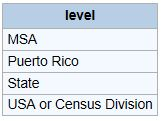

In [58]:
Image(filename='Anaconda3\\output\\level_unique_values.JPG')  

In [59]:
df_states.shape

(96243, 8)

Check for missing values.

In [60]:
df_states.isnull().sum()

date_idx      0
hpi_type      0
hpi_flavor    0
frequency     0
level         0
place_name    0
place_id      0
index_nsa     2
dtype: int64

What imputation method should be used to treat missing data?.  We can start by finding the range of values.  Like most languages, there are multiple methods for accomplishing a given task.  

We can set an index on the 'index_nsa' values and find the maximum and minimum.

In [61]:
df_states.set_index('index_nsa', inplace=True, drop=False)

In [62]:
print('Max value for index_nsa:', df_states['index_nsa'].max())
print('Min value for index_nsa:', df_states['index_nsa'].min())

Max value for index_nsa: 791.71
Min value for index_nsa: 18.31


PROC SQL for finding min and max.

````
    85       proc sql;
    86          select max (index_nsa) as max_index_nsa,
    87                 min (index_nsa) as min_index_nsa
    88          from df_states;
    89       quit;
````

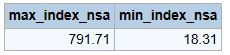

In [63]:
Image(filename='Anaconda3\\output\\max_min_index_nsa.JPG')  

Alternatively, we can sort the values and use the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#.iloc-Indexer"> iloc </a> indexer.  

Recall that the .iloc indexer returns slices by index position similiar to the way \_n\_ in SAS behaves.

## Sort and Sort Sequences

This is a good opportunity to understand the sort behaviors for DataFrames.  We begin by examing what I refer to as the default sort.  We have provided the minimum argument to the .sort_values attribute, the sort key in the example below.

In [64]:
default_srt = df_states.sort_values('index_nsa')

By examing the first the first two rows of the sorted DataFrame, 'states_srt', we can see the default sort sequence is ascending.  Of course, by reading the doc for <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a> we could see this as well. 

In [65]:
default_srt.iloc[[0, 1], :]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
18.31,1975-03-01,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,18.31
18.82,1975-04-01,traditional,all-transactions,quarterly,MSA,"San Jose-Sunnyvale-Santa Clara, CA",41940,18.82


The default SAS sort syntax is:

````
    30        proc sort data=df_states;
    31           by index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
    32        
    33         data first2;
    34            set df_states (obs=2);
    35            by index_nsa;
````

We can also see that the panda default sort sequence places NaN's last in the sort sequence by default.  So this can be an alternative to using boolean operators and the .loc() method to detect missing values.

In [66]:
default_srt.iloc[[-1, -2],:]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
NaN,1982-01-01,traditional,all-transactions,quarterly,State,West Virginia,WV,NaN
NaN,1976-01-01,traditional,all-transactions,quarterly,State,Vermont,VT,NaN


In contrast, the default SAS sort sequence places missing values first in the data set.

````   
    30        proc sort data=df_states;
    31           by index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
    32        
    33         data first2;
    34            set df_states (obs=2);
    35            by index_ns;
````

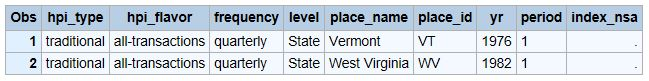

In [67]:
Image(filename='Anaconda3\\output\\sas_default_sort.JPG')  

Since there were 2 NaN's found at the 'bottom' of the DataFrame, use the .iloc indexer to return the 3rd and 4th rows displaying the 2 highest values for the column 'index_nsa'.

In [68]:
default_srt.iloc[[-3, -4], :]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
791.71,2016-02-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,791.71
780.98,2016-01-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,780.98


The SAS program to access the last two observations in the data set is:

````
    79         data last2;  
    80           set df_states (firstobs=96243);
    81           by index_nsa;

    NOTE: 2 observations were read from "WORK.last2"
````    

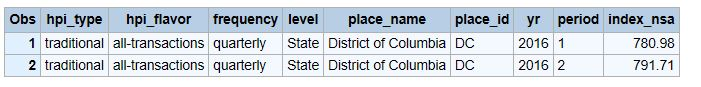

In [69]:
Image(filename='Anaconda3\\output\\get_last2_obs.JPG')  

Like pandas, the default SAS sort sequence is ascending.  And this is confirmed by the SAS doc located <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#sort-overview.htm"> here </a>.

So naturally, we can alter the organization of the data_frame by supplying arguments and values to the sort_values attribute.  The example below sorts using a descending sort sequence and places missing values at the beginning.

In [70]:
states_srt2 = df_states.sort_values('index_nsa', ascending=False, na_position='first')

Setting the na_position= argument to 'first' places NaN's at the beginning of the sort sequence.  This is the same beavhior for SAS' sort sequence.  Details are described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p0tmoipp0ci6wkn0z27ev47sv0ov.htm"> here </a>.

The first two rows in the DataFrame 'states_srt2' contain the NaN's values for the 'index_nsa' column, while the next 2 rows contain the highest values.

In [71]:
states_srt2.iloc[0:4,]

,date_idx,hpi_type,hpi_flavor,frequency,level,place_name,place_id,index_nsa
index_nsa,,,,,,,,
NaN,1976-01-01,traditional,all-transactions,quarterly,State,Vermont,VT,NaN
NaN,1982-01-01,traditional,all-transactions,quarterly,State,West Virginia,WV,NaN
791.71,2016-02-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,791.71
780.98,2016-01-01,traditional,all-transactions,quarterly,State,District of Columbia,DC,780.98


SAS has missing 28 missing value indicators for numerics described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p175x77t7k6kggn1io94yedqagl3.htm"> here </a>.  However, if you want missing values to be 'first' in a data set using a descending sort sequence, then the missing value indicator must be an actual numeric value larger than the largest non-missing value.  In other words, the SAS missing value indicator for numerics is always the smallest numeric value.

The SAS example below sorts the df_states data set in descending order by the 'index_nsa' variable.  Like the panda example above, the 

    out=states_srt2
    
syntax creates the new SAS data set 'states_srt2'. 

````
    44        proc sort data=df_states
    45           out=states_srt2;
    46           by descending index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.states_srt2" has 96244 observation(s) and 9 variable(s)
    47        
    48         data first4;
    49           set states_srt2 (obs=4);
    50           by descending index_nsa;
````

#### Start a new dataframe here for the frequency shifting example

In the case of the aggregate U.S. housing index (DataFrame 'df_us') created above, the value for the 'frequency' column is monthly. So we need to find what the frequency value is for the 'states_srt2' DataFrame.    

In [ ]:
states_srt2.describe(include=['O'])

In [ ]:
states_srt2['level'].unique()

### have not introduced groupby and most of the examples are in chapter 13

In [ ]:
states_srt2.groupby('level').count() 

In [ ]:
df_states.sort_values('place_name')


In [ ]:
df_states.set_index('place_name', inplace=True)

In [ ]:
df_states.columns

In [ ]:
la = df_states.loc['Los Angeles-Long Beach-Glendale, CA (MSAD)']

In [ ]:
la

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    